In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/home/hwang/SIB/dataset/example_log.csv'

x_names = ['L%d%c' % (i, c) for i in range(21) for c in ['x', 'y', 'z']] 
y_names = ['a', 's', 'd', 'f']

col_names = x_names + y_names

df = pd.read_csv(file_path, names=col_names)

In [3]:
df = df.iloc[df.index[:340]]

In [4]:
df.describe()

,L0x,L0y,L0z,L1x,L1y,L1z,L2x,L2y,L2z,L3x,...,L19x,L19y,L19z,L20x,L20y,L20z,a,s,d,f
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,...,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,0.719941,0.269655,-0.000048,0.666041,0.289558,-0.023856,0.623224,0.334565,-0.066522,0.597880,...,0.739939,0.458818,-0.216369,0.728462,0.491168,-0.230317,0.100000,0.117647,0.111765,0.105882
std,0.026315,0.013002,0.000027,0.021412,0.011824,0.012779,0.020904,0.011737,0.016723,0.021477,...,0.039299,0.018307,0.022162,0.038803,0.017378,0.029003,0.300442,0.322665,0.315541,0.308140
min,0.254978,0.242139,-0.000172,0.305112,0.275071,-0.058577,0.328183,0.323878,-0.108724,0.344311,...,0.181324,0.395153,-0.286815,0.198124,0.410578,-0.319444,0.000000,0.000000,0.000000,0.000000
25%,0.718412,0.261132,-0.000061,0.664340,0.281764,-0.032967,0.620321,0.328141,-0.078453,0.593376,...,0.734270,0.451206,-0.228388,0.718368,0.484919,-0.247615,0.000000,0.000000,0.000000,0.000000
50%,0.722139,0.266039,-0.000049,0.666489,0.285592,-0.020605,0.621958,0.331985,-0.062681,0.595473,...,0.746823,0.460792,-0.217191,0.734607,0.495038,-0.230643,0.000000,0.000000,0.000000,0.000000
75%,0.726273,0.276194,-0.000036,0.668647,0.292817,-0.014170,0.623731,0.336765,-0.053552,0.597932,...,0.753256,0.472142,-0.203575,0.744149,0.501400,-0.212657,0.000000,0.000000,0.000000,0.000000
max,0.733586,0.315520,0.000039,0.726012,0.348774,0.000405,0.726261,0.409583,-0.033014,0.723193,...,0.768643,0.495404,-0.094347,0.764637,0.521641,-0.084709,1.000000,1.000000,1.000000,1.000000


In [5]:
landmark = ['WRIST', 
            'THUMB_CMC',         'THUMB_MCP',         'THUMB_IP',          'THUMB_TIP', 
            'INDEX_FINGER_MCP',  'INDEX_FINGER_PIP',  'INDEX_FINGER_DIP',  'INDEX_FINGER_TIP',
            'MIDDLE_FINGER_MCP', 'MIDDLE_FINGER_PIP', 'MIDDLE_FINGER_DIP', 'MIDDLE_FINGER_TIP',
            'RING_FINGER_MCP',   'RING_FINGER_PIP',   'RING_FINGER_DIP',   'RING_FINGER_TIP',
            'PINKY_MCP',         'PINKY_PIP',         'PINKY_DIP',         'PINKY_TIP']

In [6]:
df.columns

Index(['L0x', 'L0y', 'L0z', 'L1x', 'L1y', 'L1z', 'L2x', 'L2y', 'L2z', 'L3x',
       'L3y', 'L3z', 'L4x', 'L4y', 'L4z', 'L5x', 'L5y', 'L5z', 'L6x', 'L6y',
       'L6z', 'L7x', 'L7y', 'L7z', 'L8x', 'L8y', 'L8z', 'L9x', 'L9y', 'L9z',
       'L10x', 'L10y', 'L10z', 'L11x', 'L11y', 'L11z', 'L12x', 'L12y', 'L12z',
       'L13x', 'L13y', 'L13z', 'L14x', 'L14y', 'L14z', 'L15x', 'L15y', 'L15z',
       'L16x', 'L16y', 'L16z', 'L17x', 'L17y', 'L17z', 'L18x', 'L18y', 'L18z',
       'L19x', 'L19y', 'L19z', 'L20x', 'L20y', 'L20z', 'a', 's', 'd', 'f'],
      dtype='object')

In [11]:
a = df[['L0x']]
a

,L0x
0,0.722763
1,0.722407
2,0.723790
3,0.727281
4,0.729255
...,...
335,0.720793
336,0.722729
337,0.722611
338,0.722479


In [8]:
scaler = StandardScaler()
scaler.fit(a)
b = scaler.transform(a)

ValueError: Expected 2D array, got 1D array instead:
array=[0.722763 0.722407 0.72379  0.727281 0.729255 0.731306 0.730358 0.731561
 0.730324 0.729194 0.728888 0.728565 0.729057 0.729205 0.727867 0.727944
 0.726608 0.728132 0.726094 0.727311 0.726892 0.727293 0.726897 0.726757
 0.726524 0.726325 0.727749 0.727331 0.728238 0.729001 0.729282 0.729316
 0.728345 0.730693 0.730173 0.730259 0.728119 0.729107 0.729303 0.730763
 0.733586 0.731899 0.729824 0.72905  0.729356 0.730208 0.729928 0.728453
 0.729281 0.729017 0.726707 0.726445 0.723762 0.721312 0.721372 0.723164
 0.722125 0.720986 0.723339 0.72341  0.720836 0.719664 0.722826 0.722912
 0.724361 0.724079 0.724972 0.725512 0.727048 0.72776  0.728231 0.727644
 0.728439 0.728266 0.727193 0.726425 0.726928 0.725313 0.724417 0.724224
 0.72416  0.72362  0.724261 0.723158 0.721353 0.719372 0.720681 0.722153
 0.723083 0.72235  0.723409 0.722573 0.724274 0.724491 0.724338 0.724803
 0.72607  0.726016 0.725139 0.72589  0.723011 0.721101 0.720011 0.71842
 0.715263 0.716566 0.719404 0.718268 0.716094 0.721508 0.722317 0.723148
 0.72162  0.718964 0.718599 0.719525 0.719572 0.718627 0.719895 0.717367
 0.716424 0.716644 0.71275  0.713691 0.718387 0.715162 0.715572 0.714243
 0.718555 0.717531 0.714761 0.717445 0.7155   0.718858 0.718521 0.718377
 0.715427 0.711353 0.722519 0.72077  0.710587 0.717374 0.719841 0.708864
 0.716979 0.713244 0.698352 0.704023 0.713124 0.715535 0.719893 0.716506
 0.71551  0.719996 0.720398 0.721048 0.720531 0.718429 0.717772 0.72015
 0.716361 0.71791  0.720271 0.720347 0.727201 0.722683 0.72086  0.720452
 0.72023  0.721048 0.721611 0.718769 0.720991 0.719839 0.721524 0.721114
 0.720418 0.719901 0.717372 0.714031 0.710161 0.717313 0.71824  0.716509
 0.710517 0.717675 0.721088 0.72678  0.724665 0.72314  0.722391 0.721814
 0.723434 0.722017 0.720835 0.721687 0.721287 0.722812 0.722112 0.724687
 0.723027 0.721862 0.722066 0.722433 0.72114  0.722372 0.720805 0.719365
 0.720658 0.720781 0.724769 0.727643 0.72663  0.724006 0.723033 0.724371
 0.722604 0.72397  0.724899 0.722762 0.724082 0.725493 0.724747 0.727959
 0.727853 0.728129 0.726653 0.724786 0.726876 0.726792 0.726958 0.727006
 0.726728 0.726636 0.727467 0.726464 0.726276 0.726272 0.72765  0.726075
 0.724291 0.719126 0.723602 0.720979 0.72179  0.720436 0.720091 0.719025
 0.715899 0.714059 0.714735 0.712791 0.717575 0.715128 0.715216 0.714064
 0.714808 0.716224 0.716428 0.717208 0.717935 0.718737 0.71799  0.719665
 0.719685 0.719231 0.721423 0.72335  0.724206 0.725073 0.727049 0.7242
 0.722677 0.723236 0.716762 0.708178 0.700379 0.71335  0.710063 0.721144
 0.707369 0.714793 0.705027 0.700354 0.708934 0.715083 0.710853 0.711934
 0.718729 0.717233 0.718662 0.720269 0.719246 0.717441 0.717342 0.715031
 0.715686 0.719242 0.720603 0.719383 0.718294 0.719614 0.718233 0.721572
 0.722098 0.724255 0.725859 0.727289 0.728345 0.729733 0.730094 0.730556
 0.729154 0.72612  0.726346 0.724731 0.726035 0.723103 0.724124 0.723118
 0.725479 0.724253 0.729526 0.727401 0.724656 0.717639 0.717585 0.708769
 0.680382 0.681916 0.678478 0.674212 0.254978 0.71562  0.718432 0.720793
 0.722729 0.722611 0.722479 0.722524].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

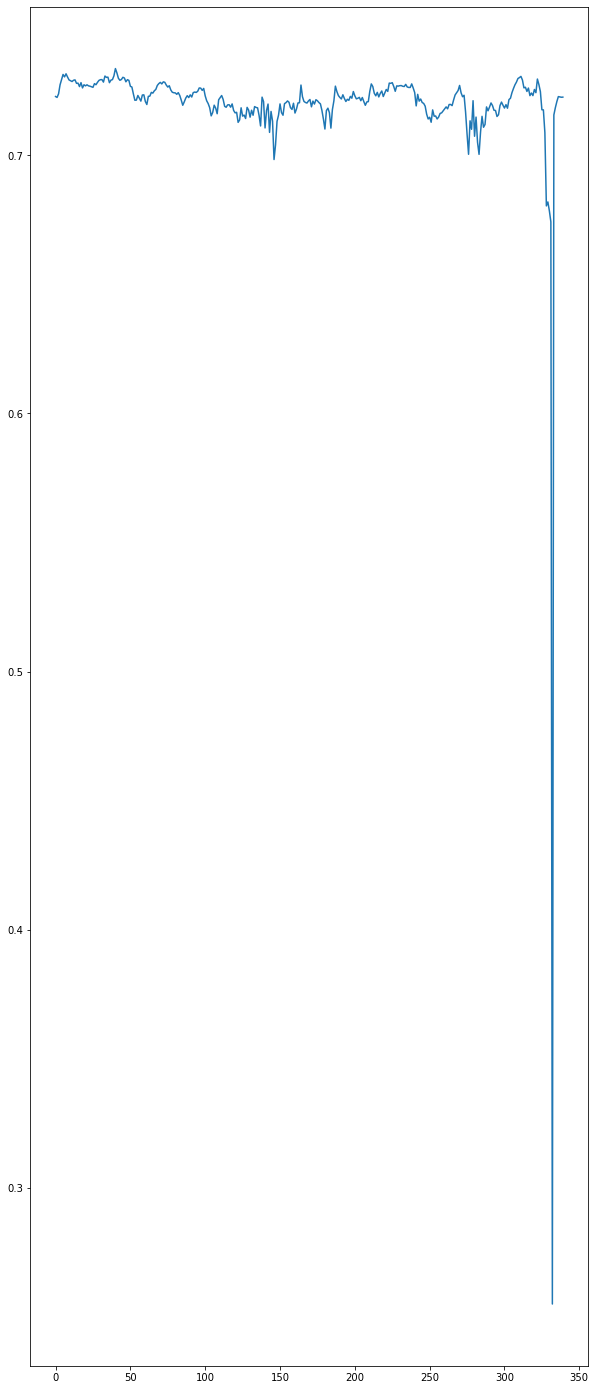

In [43]:
# plt.figure(figsize=(10, 25))

# plt.plot(a)

# plt.show()

In [44]:
# MIN_BOUND = 0.73
# MAX_BOUND = 0.5

# def normalize(a):
#     a = (a - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
#     a[a>1] = 1.
#     a[a<0] = 0.
#     return a

In [45]:
# print(normalize(a))

0      0.031465
1      0.033013
2      0.027000
3      0.011822
4      0.003239
         ...   
335    0.040030
336    0.031613
337    0.032126
338    0.032700
339    0.032504
Name: L0x, Length: 340, dtype: float64
